#### <H2> Project  - 4 Application of Clustering Models </H2>

<H4>Importing Libraries </H4>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist, pdist
%matplotlib inline
import seaborn as sns
import pylab as pl

In [2]:
data = pd.read_csv('data_stocks.csv')

<H3>Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance </H3>

In [3]:
data.shape

(41266, 502)

In [4]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
# We don't need Date and SP500 for doing the clusters so dropping both the columns
data.drop(["DATE"],axis = 1,inplace= True)
data.drop(["SP500"],axis = 1,inplace= True)

In [6]:
data.head(5)

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
sns.set()
X = data

<H3>  As there are 500 columns, we will not be able to visualise and will reduce the dimensions to 3 using PCA </H3>

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X_reduced = pca.transform(data)

In [10]:
X_reduced.shape

(41266, 3)

<H3> Plot 3d graph </H3>

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# convert the reduced data to dataframe.
X_reduced_df = pd.DataFrame(X_reduced, columns = ["pc1", "pc2", "pc3"])

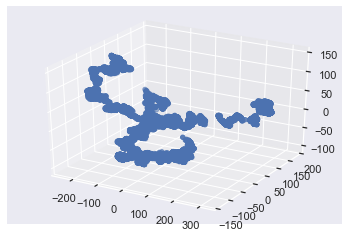

In [12]:
#plot the reduced data onto 3d graph
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata, ydata, zdata, cmap='Greens')

<H3> Based on the above graph plot, we can 3-5 clusters on the data</H3>

<H4>Fit the KMeans with 3 clusters to group the similar stocks</H4>

In [13]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(data)
y_pred = k_means.predict(data)

<H4>Plot the graph with the different clours for each clusters </H4>

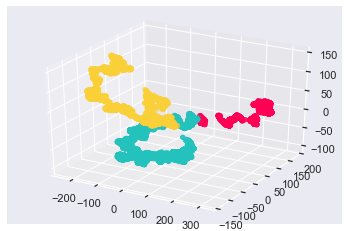

In [14]:
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata, ydata, zdata, c=colors[y_pred])

<H4> Fit the KMeans with 4 clusters to group the similar stocks
    Plot the graph with the different clours for each clusters </H4>

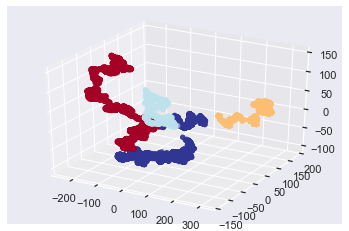

In [15]:
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(data)
y_pred = k_means.predict(data)


fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata, ydata, zdata, c=y_pred, cmap = 'RdYlBu')


<H4> Fit the KMeans with 5 clusters to group the similar stocks
    Plot the graph with the different clours for each clusters </H4>

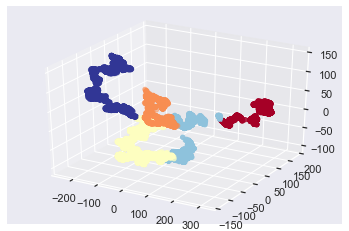

In [16]:
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(data)
y_pred = k_means.predict(data)


fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata, ydata, zdata, c=y_pred, cmap = 'RdYlBu')

<H3> The Stocks which are performing similar are colour grouped. Stocks under each cluster are similar. </H3>

<H4>Problem 2:
How many Unique patterns that exist in the historical stock data set, 
based on fluctuations in price. </H4>

<H4> As the only data we have is the price, the no of clusters will give the unique pattern. In the above code, we have built clusters of 3,4 and 5 </H4>

In [ ]:
data['clusters'] = y_pred

<H3> Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.</H3>

<H4>For  the above problem we need clusters based on Stocks. As Stocks are given as columns we will transpose them before we do clustering </H4>

In [18]:
# As mentioned earlier, we will transpose the rows and columns so that we can cluster based on stocks.
df = data.transpose()

<H4>  As there are 41K columns, we will not be able to visualise and will reduce the dimensions to 3 using PCA </H4>

In [19]:
pca = PCA(n_components = 3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_reduced_1 = pca.transform(df)

In [21]:
X_reduced_1.shape

(501, 3)

In [23]:
X_reduced_df_1 = pd.DataFrame(X_reduced_1, columns = ["pc1", "pc2", "pc3"])

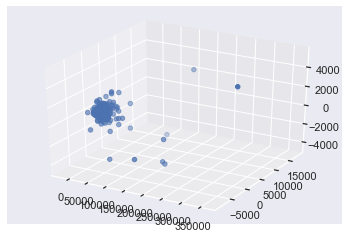

In [24]:
#plot the reduced data onto 3d graph
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = X_reduced_df_1.pc1
ydata = X_reduced_df_1.pc2
zdata = X_reduced_df_1.pc3
ax.scatter3D(xdata, ydata, zdata, cmap='Greens')

In [25]:
k_means = KMeans(n_clusters=15, random_state=0)
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [26]:
y_pred = k_means.predict(df)

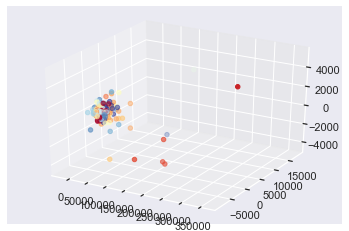

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = X_reduced_df_1.pc1
ydata = X_reduced_df_1.pc2
zdata = X_reduced_df_1.pc3
ax.scatter3D(xdata, ydata, zdata, c=y_pred, cmap = 'RdYlBu')

In [28]:
df['clusters'] = y_pred

In [39]:
df_tmp = df.iloc[:,[0,-1]]

In [41]:
df_tmp.head(10)

,0,clusters
NASDAQ.AAL,42.33,3
NASDAQ.AAPL,143.68,14
NASDAQ.ADBE,129.63,12
NASDAQ.ADI,82.04,9
NASDAQ.ADP,102.23,0
NASDAQ.ADSK,85.22,0
NASDAQ.AKAM,59.76,3
NASDAQ.ALXN,121.52,12
NASDAQ.AMAT,38.99,3
NASDAQ.AMD,14.61,10


<H3>Each row specifies a stock and a cluster number is stored in the cluster column. Similar stocks will have the same cluster number</H3>
